# Statistical Test

1. Do cluster have different binding affinities?
2. Are paratope sequences (or their identity scores) more similar within a checkpoint than between different checkpoints?

# Import

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import defaultdict, Counter 
from Bio.SeqUtils import seq1
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.stats import mannwhitneyu

import matplotlib.cm as cm
from scipy.stats import kruskal
from itertools import combinations
from scipy.stats import mannwhitneyu


plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['axes.titleweight'] = 'bold'


# Do cluster have different binding affinities? 

In [6]:
section = 'paratope' # Change to 'epitope' for epitope on the whole doc

section_df = pd.read_csv(f"data/structural_analysis/{section.capitalize()}/{section}_hbonds_salt_bridges_summary.csv")

section_df.rename(columns={"folder": "checkpoint"}, inplace=True)

if section.lower() == "paratope":
    manual_clusters = {
    "Cluster 1": ["5b8c", "5ggs"],
    "Cluster 2": ["9dq4", "9dq3", "5tru", "7su0", "7su1", "5jx3", "6rp8"],
    "Cluster 3": ["5ggr", "5wt9", "5ggv", "7bxa", "7cgw"],
    "Cluster 4": ["5x8l", "5xxy"],
    "Cluster 5": ["6txz"],
    "Cluster 6": ["7wvm", "8gy5"],
    }
else: 
    manual_clusters = {
    "Cluster 1": ["7su1", "6rp8", "7su0", "5tru", "5xj3", "9dq3", "5ggv", "9dq4"],
    "Cluster 2": ["6txz"],
    "Cluster 3": ["5grj", "5x8m", "5xj4", "5x8l", "5xxy"],
    "Cluster 4": ["5ggs", "5b8c", "7bxa", "6xkr", "5jxe", "7cgw"],
    "Cluster 5": ["6k0y", "5wt9", "5ggr", "7cu5", "8gy5", "7wsl", "7wvm"],

}

# Convert manual Cluster-Dict in list 
cluster_rows = []
for cluster_name, pdb_list in manual_clusters.items():
    for pdb in pdb_list:
        cluster_rows.append({"pdb_id": pdb, "cluster": cluster_name})

# DF
cluster_df = pd.DataFrame(cluster_rows)

# Merge with main df 
merged_df = cluster_df.merge(section_df[["pdb_id", "binding_score", "checkpoint"]], on="pdb_id", how="left")


print(merged_df)


   pdb_id    cluster  binding_score checkpoint
0    5b8c  Cluster 1       0.052542        pd1
1    5b8c  Cluster 1       0.074294        pd1
2    5b8c  Cluster 1       0.076204        pd1
3    5b8c  Cluster 1       0.191828        pd1
4    5ggs  Cluster 1       0.060186        pd1
5    5ggs  Cluster 1       0.183615        pd1
6    9dq4  Cluster 2       0.067610      ctla4
7    9dq3  Cluster 2       0.039324      ctla4
8    5tru  Cluster 2       0.048571      ctla4
9    5tru  Cluster 2       0.142831      ctla4
10   7su0  Cluster 2       0.313449      ctla4
11   7su0  Cluster 2       0.419594      ctla4
12   7su1  Cluster 2       0.289538      ctla4
13   5jx3  Cluster 2            NaN        NaN
14   6rp8  Cluster 2       0.135876      ctla4
15   6rp8  Cluster 2       0.066769      ctla4
16   5ggr  Cluster 3       0.082390        pd1
17   5ggr  Cluster 3       0.073501        pd1
18   5wt9  Cluster 3       0.070106        pd1
19   5ggv  Cluster 3       0.068575      ctla4
20   7bxa  Cl

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/720140290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="cluster", y="binding_score", palette="viridis")


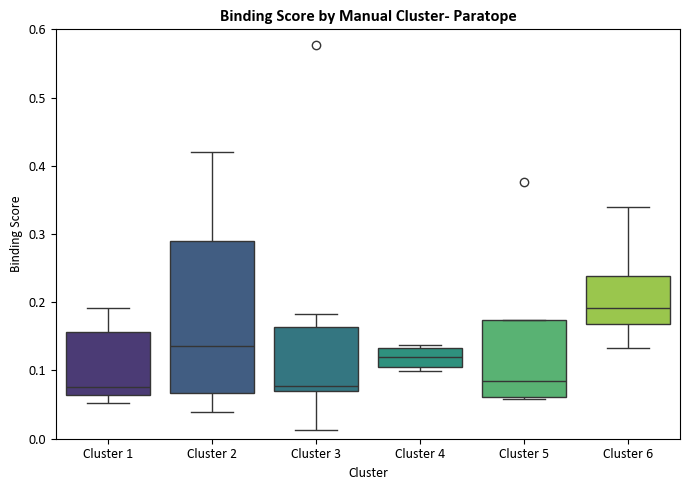

In [7]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=merged_df, x="cluster", y="binding_score", palette="viridis")

plt.title(f"Binding Score by Manual Cluster- {section.capitalize()}")
plt.xlabel("Cluster")
plt.ylabel("Binding Score")
plt.tight_layout()
plt.ylim(0, 0.6)

plt.savefig(f"plots/structural_analysis/statistical_analysis/{section.capitalize()}/{section}_binding_score_by_cluster.pdf", bbox_inches='tight')


In [8]:
# group by cluster 
grouped_scores = [
    group["binding_score"].dropna().values
    for name, group in merged_df.groupby("cluster")
]

# Kruskal–Wallis-Test
stat, p = kruskal(*grouped_scores)

print(f"Kruskal–Wallis-Test: H = {stat:.3f}, p = {p:.4e}")

Kruskal–Wallis-Test: H = 4.067, p = 5.3975e-01


/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/2561669429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="pdb_id", y="binding_score", palette="viridis")


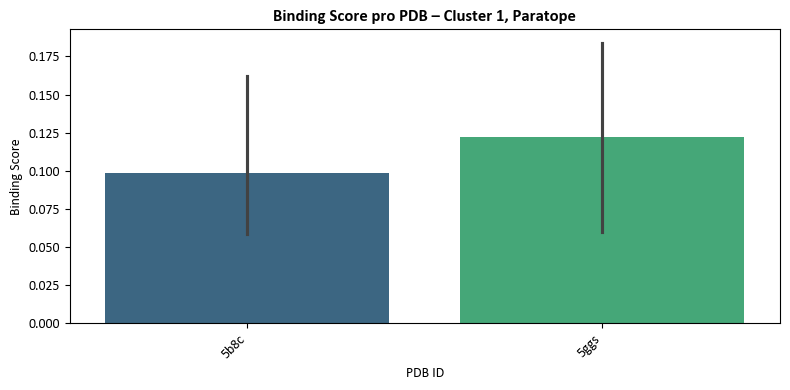

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/2561669429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="pdb_id", y="binding_score", palette="viridis")


<Figure size 640x480 with 0 Axes>

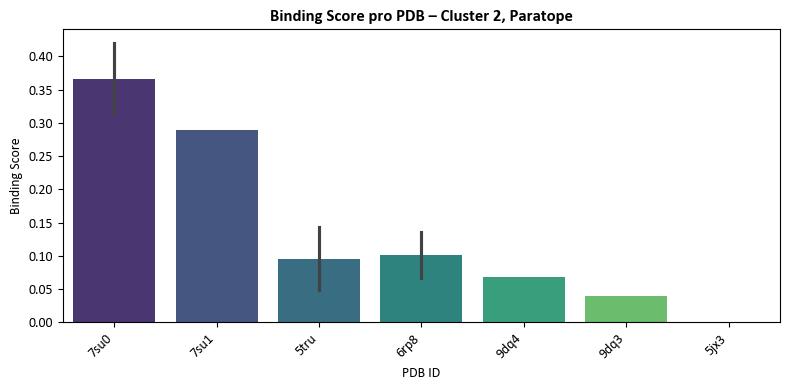

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/2561669429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="pdb_id", y="binding_score", palette="viridis")


<Figure size 640x480 with 0 Axes>

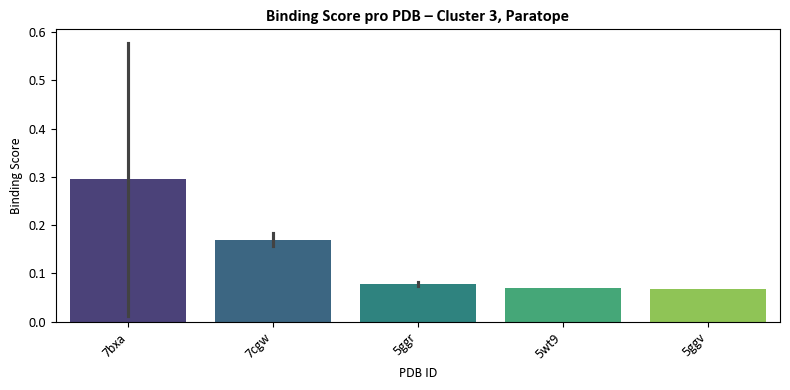

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/2561669429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="pdb_id", y="binding_score", palette="viridis")


<Figure size 640x480 with 0 Axes>

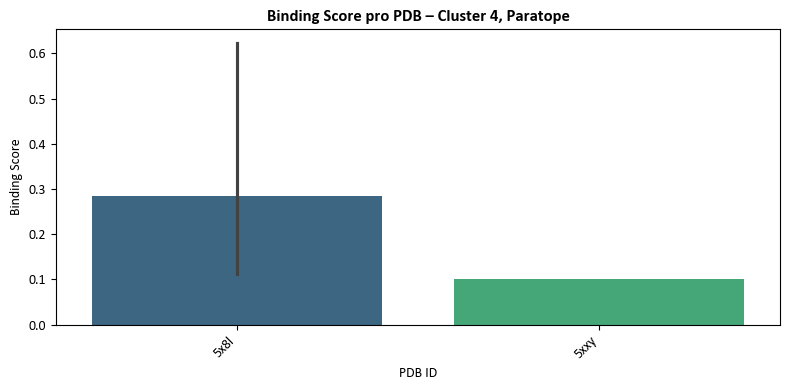

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/2561669429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="pdb_id", y="binding_score", palette="viridis")


<Figure size 640x480 with 0 Axes>

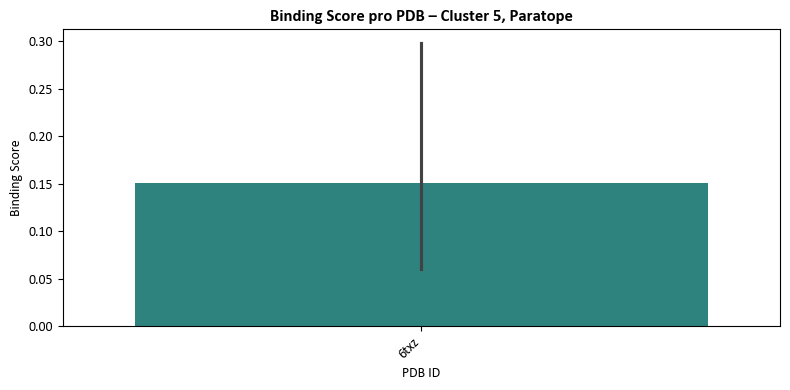

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/2561669429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="pdb_id", y="binding_score", palette="viridis")


<Figure size 640x480 with 0 Axes>

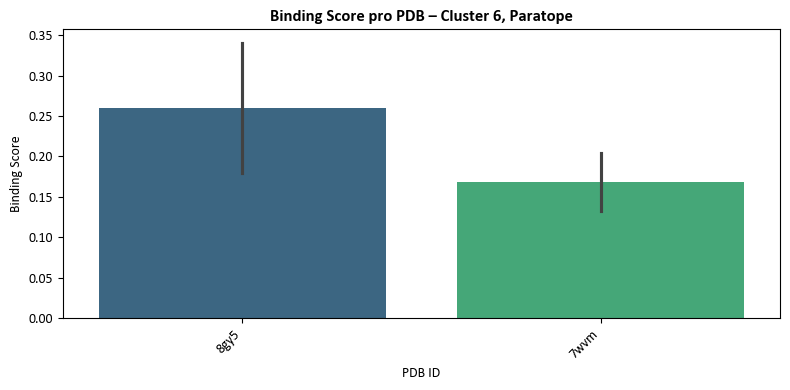

<Figure size 640x480 with 0 Axes>

In [9]:
clusters = merged_df["cluster"].unique()

# Plot per Cluster
for cluster_name in clusters:
    subset = merged_df[merged_df["cluster"] == cluster_name].sort_values("binding_score", ascending=False)

    plt.figure(figsize=(8, 4))
    sns.barplot(data=subset, x="pdb_id", y="binding_score", palette="viridis")
    plt.title(f"Binding Score pro PDB – {cluster_name}, {section.capitalize()}")
    plt.xlabel("PDB ID")
    plt.ylabel("Binding Score")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"plots/structural_analysis/statistical_analysis/{section.capitalize()}/{section}_Binding Score pro PDB – {cluster_name}.pdf", bbox_inches='tight')



/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/243916267.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_binding_pairs, x="group", y="mean_binding", palette=["#404688", "#21908d"])


Mann–Whitney U-Statistik: 46941.00
P-Wert: 0.4866


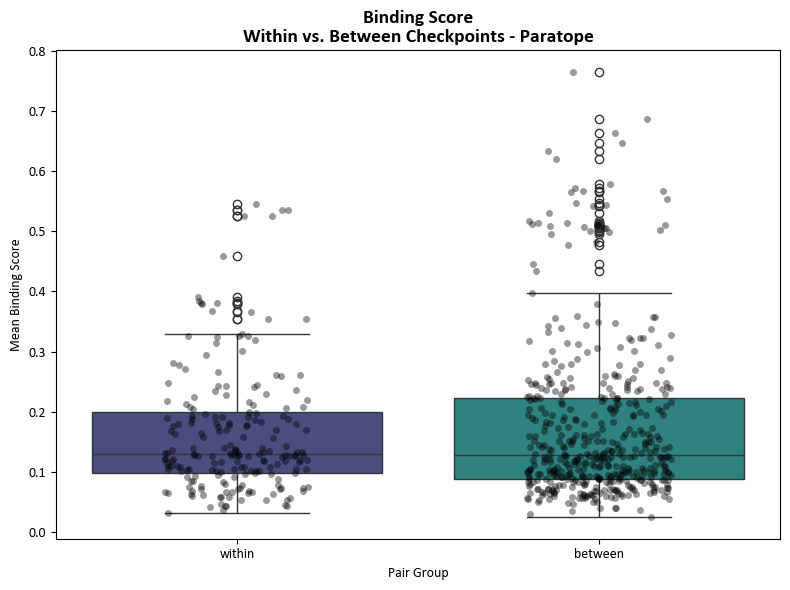

In [10]:
# Drop NaNs in binding_score/checkpoint 
clean_df = merged_df.dropna(subset=["binding_score", "checkpoint"])

# Generate all pairwise combinations
pairs = []
for (p1, row1), (p2, row2) in combinations(clean_df.iterrows(), 2):
    score1 = row1["binding_score"]
    score2 = row2["binding_score"]

    if pd.notna(score1) and pd.notna(score2):
        pairs.append({
            "pdb_1": row1["pdb_id"],
            "pdb_2": row2["pdb_id"],
            "mean_binding": (score1 + score2) / 2,
            "same_checkpoint": row1["checkpoint"] == row2["checkpoint"],
        })

# Create DataFrame and group labels
df_binding_pairs = pd.DataFrame(pairs)
df_binding_pairs = df_binding_pairs.dropna(subset=["mean_binding"])
df_binding_pairs["group"] = df_binding_pairs["same_checkpoint"].map({True: "within", False: "between"})

# Statistical test
within = df_binding_pairs[df_binding_pairs["group"] == "within"]["mean_binding"]
between = df_binding_pairs[df_binding_pairs["group"] == "between"]["mean_binding"]

stat, p = mannwhitneyu(within, between, alternative="greater")
print(f"Mann–Whitney U-Statistik: {stat:.2f}")
print(f"P-Wert: {p:.4f}")

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_binding_pairs, x="group", y="mean_binding", palette=["#404688", "#21908d"])
sns.stripplot(data=df_binding_pairs, x="group", y="mean_binding", color='black', alpha=0.4, jitter=0.2)

plt.title(f"Binding Score\nWithin vs. Between Checkpoints - {section.capitalize()}", fontsize=14)
plt.ylabel("Mean Binding Score")
plt.xlabel("Pair Group")
plt.tight_layout()
plt.savefig(f"plots/structural_analysis/statistical_analysis/{section.capitalize()}/{section}_Binding Score_within_vs_between_checkpoints.pdf", bbox_inches='tight')
plt.show()


In [11]:
merged_df

,pdb_id,cluster,binding_score,checkpoint
0,5b8c,Cluster 1,0.052542,pd1
1,5b8c,Cluster 1,0.074294,pd1
2,5b8c,Cluster 1,0.076204,pd1
3,5b8c,Cluster 1,0.191828,pd1
4,5ggs,Cluster 1,0.060186,pd1
5,5ggs,Cluster 1,0.183615,pd1
6,9dq4,Cluster 2,0.067610,ctla4
7,9dq3,Cluster 2,0.039324,ctla4
8,5tru,Cluster 2,0.048571,ctla4
9,5tru,Cluster 2,0.142831,ctla4


# Are paratope sequences (or their identity scores) more similar within a checkpoint than between different checkpoints?

In [12]:
# Read the file using the first column as index
df_identity = pd.read_csv(
    "data/structural_analysis/Paratope/paratope_sequence_comparison_matrix.csv",
    index_col=0
)

df_identity.index = df_identity.index.astype(str).str.lower()
df_identity.columns = df_identity.columns.astype(str).str.lower()


merged_df["pdb_id"] = merged_df["pdb_id"].astype(str).str.lower()




In [13]:

pairs = []

for pdb1, pdb2 in combinations(df_identity.index, 2):
    if pdb1 not in merged_df["pdb_id"].values or pdb2 not in merged_df["pdb_id"].values:
        continue  
    
    identity = df_identity.loc[pdb1, pdb2]
    
    # checkpoints
    cp1 = merged_df[merged_df["pdb_id"] == pdb1]["checkpoint"]
    cp2 = merged_df[merged_df["pdb_id"] == pdb2]["checkpoint"]
    
    if cp1.empty or cp2.empty:
        continue
    
    group1 = cp1.values[0]
    group2 = cp2.values[0]
    same_group = group1 == group2

    pairs.append({
        "pdb1": pdb1,
        "pdb2": pdb2,
        "identity": identity,
        "same_checkpoint": same_group
    })

df_pairs = pd.DataFrame(pairs)



In [14]:
within = df_pairs[df_pairs["same_checkpoint"] == True]["identity"]
between = df_pairs[df_pairs["same_checkpoint"] == False]["identity"]

stat, p = mannwhitneyu(within, between, alternative="greater")
print(f"Mann–Whitney U-Statistik: {stat:.2f}")
print(f"P-Wert: {p:.4f}")

Mann–Whitney U-Statistik: 37.50
P-Wert: 0.1159


In [15]:
print(len(within), len(between))

6 9


/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/4042765613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pairs, x="group", y="identity", palette=["#fde725", "#21918c"], whiskerprops=dict(color="white"),capprops=dict(color="white"),
/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_99384/4042765613.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_pairs, x="group", y="identity", palette=["#fde725", "#21918c"], alpha=0.4, jitter=0.2)


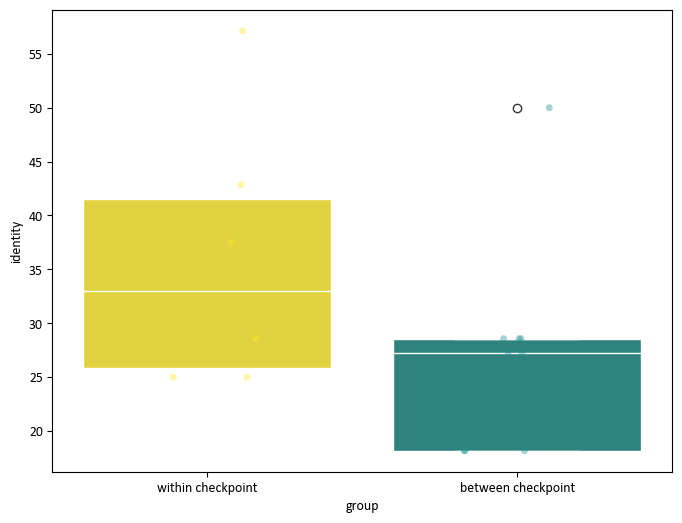

In [16]:

# bool
df_pairs["same_checkpoint"] = df_pairs["same_checkpoint"].astype(bool)

# Labels
df_pairs["group"] = df_pairs["same_checkpoint"].map({True: "within checkpoint", False: "between checkpoint"})

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_pairs, x="group", y="identity", palette=["#fde725", "#21918c"], whiskerprops=dict(color="white"),capprops=dict(color="white"),
    medianprops=dict(color="white"), boxprops=dict(edgecolor="white"))
sns.stripplot(data=df_pairs, x="group", y="identity", palette=["#fde725", "#21918c"], alpha=0.4, jitter=0.2)


# ax = plt.gca()  # get current axes

# # Set all text and spines to white
# ax.set_title(f"{section.capitalize()} Sequence Identity\nWithin vs. Between Checkpoints", fontsize=14, color='white')
# ax.set_xlabel("Pair Group", color='white')
# ax.set_ylabel("Sequence Identity (%)", color='white')
# ax.tick_params(axis='x', colors='white', rotation=45)
# ax.tick_params(axis='y', colors='white')

# # White border around heatmap
# for spine in ax.spines.values():
#     spine.set_edgecolor('white')

# # Set annotation text color inside the heatmap
# for text in ax.texts:
#     text.set_color('white')

plt.savefig(
   f'plots/structural_analysis/statistical_analysis/{section.capitalize()}/{section}_Paratope_sequence_identity_within_vs_between_checkpoints.png',
    dpi=300,
    bbox_inches='tight',
    transparent=True
)

plt.savefig(f"plots/structural_analysis/statistical_analysis/{section.capitalize()}/{section}_Paratope_sequence_identity_within_vs_between_checkpoints.pdf", bbox_inches='tight')
plt.show()
